# Gradient in _K_ with migration, selection

In these simulations, we explored the effects of selection in generating clines. All populations were initialized at carrying capacity (K = 1000). We performed simulations under 3 migration rates: 0, 0.01, 0.05. Simulations included 10 selection coefficients: 0; 0.001; 0.0025; 0.005; 0.0075; 0.01; 0.025; 0.05; 0.1; 0.2 The parameter combinations were as follows (all varied parameters crossed factorially, total simulations = 30): 

* Number of simulations: 1000
* Number of generations: 500
* Max Creation probability: NA
* Bottleneck proportion: NA
* pA and pB: 0.5 and 0.5
* Migration rate: [0; 0.01; 0.05]
* Maximum _K_ (rural): 1000
* Minimum _K_ (urban): 1000
* Maximum selection coefficient: 0; 0.001; 0.0025; 0.005; 0.0075; 0.01; 0.025; 0.05; 0.1; 0.2

In [25]:
library(plyr)
library(ggplot2)
library(data.table)
library(Rmisc)
library(dplyr)

In [26]:
#Working directory for datasets varying migration rate and bottleneck proportion 
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/allFill_Selection')

# Dataset for mean slope and proportions by parameter combination
MeansProps <- fread('20171221_MeansProps_allFill_Selection.csv', header = T)
MeansProps$max_s = as.factor(as.character(MeansProps$max_s))
MeansProps$Mig_rate = as.factor(as.character(MeansProps$Mig_rate))
# MeansProps$prop_sigPos[MeansProps$prop_sigPos == 1.000] <- 0.0

# Dataset with output from each regression
RegSummary <- fread('20171221_RegSummary_allFill_Selection.csv')

Read 15000000 rows and 6 (of 6) columns from 0.786 GB file in 00:00:12


In [27]:
#Data subsets
MeansProps_Gen250 <- subset(MeansProps, seq == "250")
MeansProps_NoMig <- subset(MeansProps, Mig_rate == "0")
MeansProps_NoMig_Gen250 <- subset(MeansProps, seq == "250" & Mig_rate == "0")

MeansProps_NoMig_Gen250_SigOnly <- RegSummary %>%
    filter(Generation == 250 & p.value < 0.05) %>% 
    group_by(Mig_rate, max_s) %>%
    summarize(mean_SigSlope = mean(estimate), 
              sd_SigSlope = sd(estimate),
              n = length(estimate),
              se_SigSlope = sd_SigSlope / sqrt(n), 
              ci_SigSlope = 1.96 * se_SigSlope)

In [28]:
MeansProps_Gen250

Mig_rate,max_s,seq,mean,sd,n,se,ci_mean,prop_sigPos,prop_pos,se_pos,ci_pos,se_sigPos,ci_sigPos,prop_sigNeg,prop_neg,se_neg,ci_neg,se_sigNeg,ci_sigNeg
0,0,250,-9.009381e-07,0.0033341983,1000,1.054366e-04,2.066557e-04,0.027,0.517,0.015802247,0.030972403,0.005125524,0.010046028,0.018,0.483,0.015802247,0.030972403,0.0042042835,0.008240396
0,0.001,250,1.769092e-03,0.0031850658,1000,1.007206e-04,1.974124e-04,0.077,0.710,0.014349216,0.028124463,0.008430362,0.016523509,0.001,0.290,0.014349216,0.028124463,0.0009994999,0.001959020
0,0.0025,250,3.767744e-03,0.0032984876,1000,1.043073e-04,2.044424e-04,0.196,0.861,0.010939790,0.021441988,0.012553247,0.024604363,0.001,0.139,0.010939790,0.021441988,0.0009994999,0.001959020
0,0.005,250,7.905487e-03,0.0033201193,1000,1.049914e-04,2.057831e-04,0.636,0.991,0.002986469,0.005853480,0.015215256,0.029821901,0.000,0.009,0.002986469,0.005853480,0.0000000000,0.000000000
0,0.0075,250,1.152211e-02,0.0030068228,1000,9.508408e-05,1.863648e-04,0.944,1.000,0.000000000,0.000000000,0.007270763,0.014250696,0.000,0.000,0.000000000,0.000000000,0.0000000000,0.000000000
0,0.01,250,1.505211e-02,0.0027837429,1000,8.802968e-05,1.725382e-04,0.998,1.000,0.000000000,0.000000000,0.001412799,0.002769085,0.000,0.000,0.000000000,0.000000000,0.0000000000,0.000000000
0,0.025,250,2.745212e-02,0.0015202230,1000,4.807367e-05,9.422440e-05,1.000,1.000,0.000000000,0.000000000,0.000000000,0.000000000,0.000,0.000,0.000000000,0.000000000,0.0000000000,0.000000000
0,0.05,250,3.376560e-02,0.0006305281,1000,1.993905e-05,3.908054e-05,1.000,1.000,0.000000000,0.000000000,0.000000000,0.000000000,0.000,0.000,0.000000000,0.000000000,0.0000000000,0.000000000
0,0.1,250,3.628324e-02,0.0002531999,1000,8.006883e-06,1.569349e-05,1.000,1.000,0.000000000,0.000000000,0.000000000,0.000000000,0.000,0.000,0.000000000,0.000000000,0.0000000000,0.000000000
0,0.2,250,3.712815e-02,0.0001014414,1000,3.207860e-06,6.287406e-06,1.000,1.000,0.000000000,0.000000000,0.000000000,0.000000000,0.000,0.000,0.000000000,0.000000000,0.0000000000,0.000000000


In [5]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15,angle=45,hjust=1),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

# Mean slope by selection and migration rate

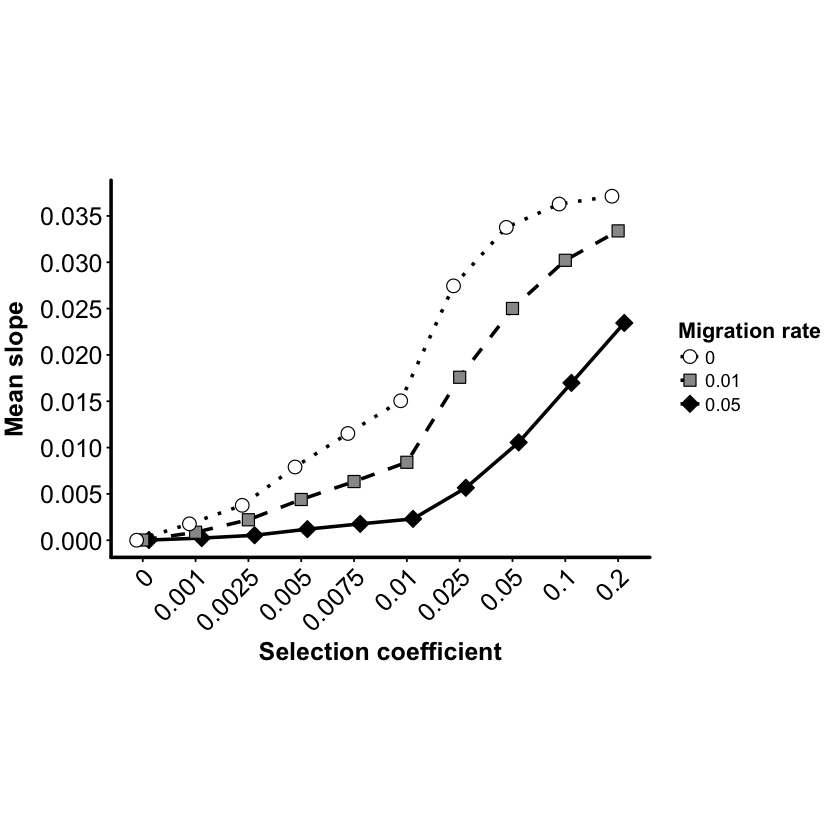

In [8]:
MeanSlope_Sel_Mig <- ggplot(MeansProps_Gen250, aes(x = max_s, y = mean, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.35)) +
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.35)) +
    geom_point(size = 3.5, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.35)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Mean slope") + xlab("Selection coefficient") + 
    coord_cartesian(ylim = c(0, 0.037)) + scale_y_continuous(breaks = seq(from = 0, to = 0.035, by = 0.005)) + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_Sel_Mig

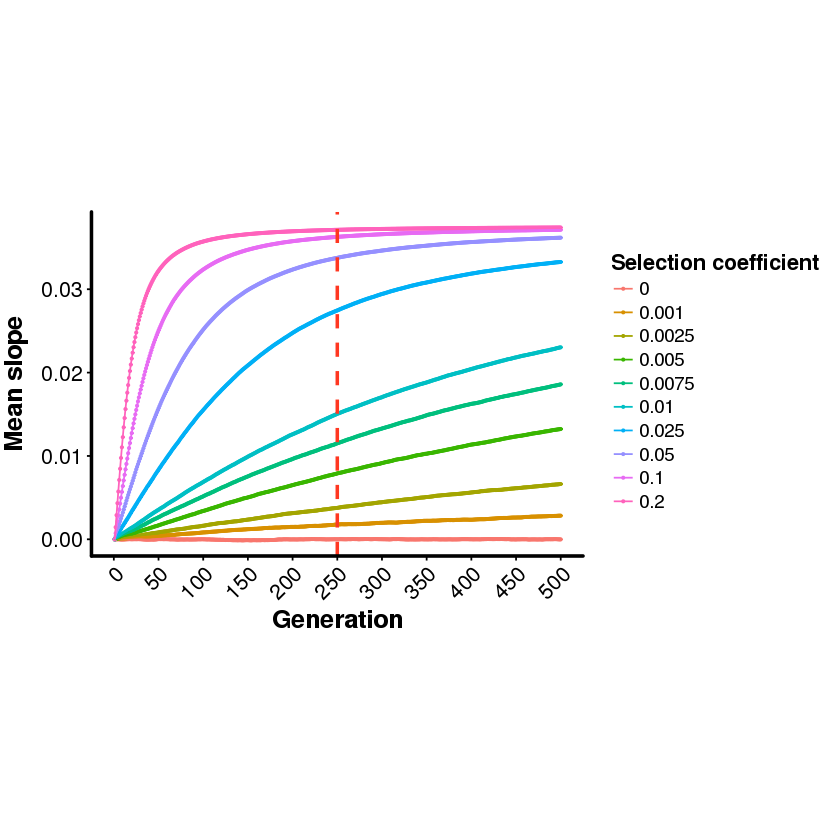

In [13]:
MeanSlope_byGen <- ggplot(MeansProps_NoMig, aes(x = seq, y = mean, group = max_s, color = max_s)) + 
    ylab("Mean slope") + xlab("Generation") + geom_point(size = 0.5, aes(color = max_s)) +
    geom_line(size = 0.5, aes(color = max_s)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Selection coefficient") + 
    geom_vline(xintercept = 250, size = 1, colour = "#FF3721", linetype = "dashed") + ng1.45
MeanSlope_byGen

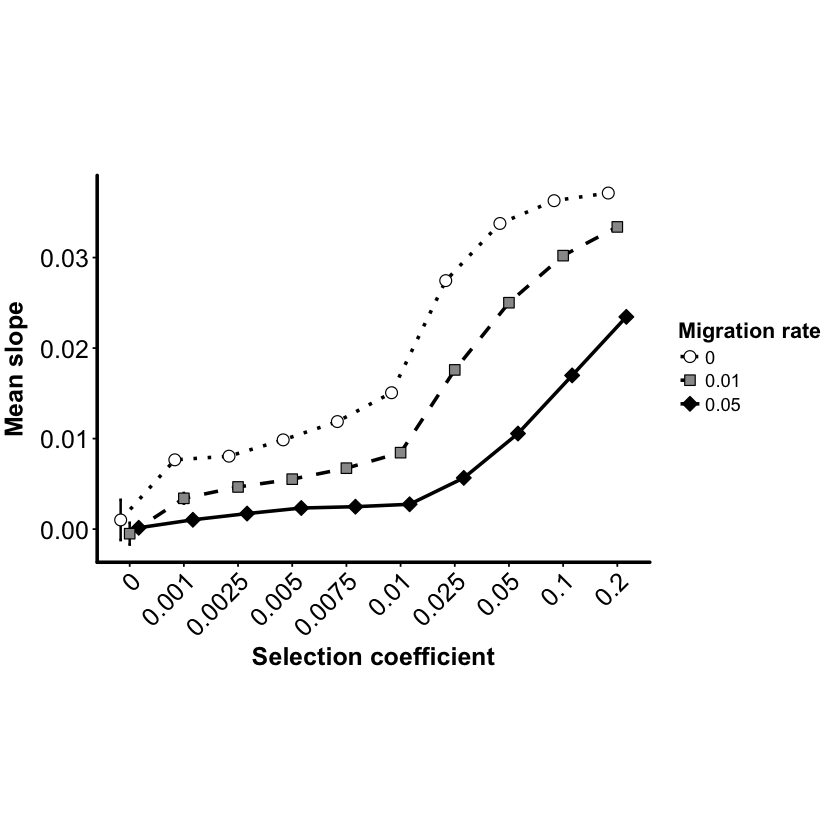

In [9]:
MeanSlope_Sel_Mig_SigOnly <- ggplot(MeansProps_NoMig_Gen250_SigOnly, aes(x = factor(max_s), y = mean_SigSlope, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = mean_SigSlope - ci_SigSlope, ymax = mean_SigSlope + ci_SigSlope), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.5)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Mean slope") + xlab("Selection coefficient") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_Sel_Mig_SigOnly

## Effects of selection, migration on proportion of negative and positive clines

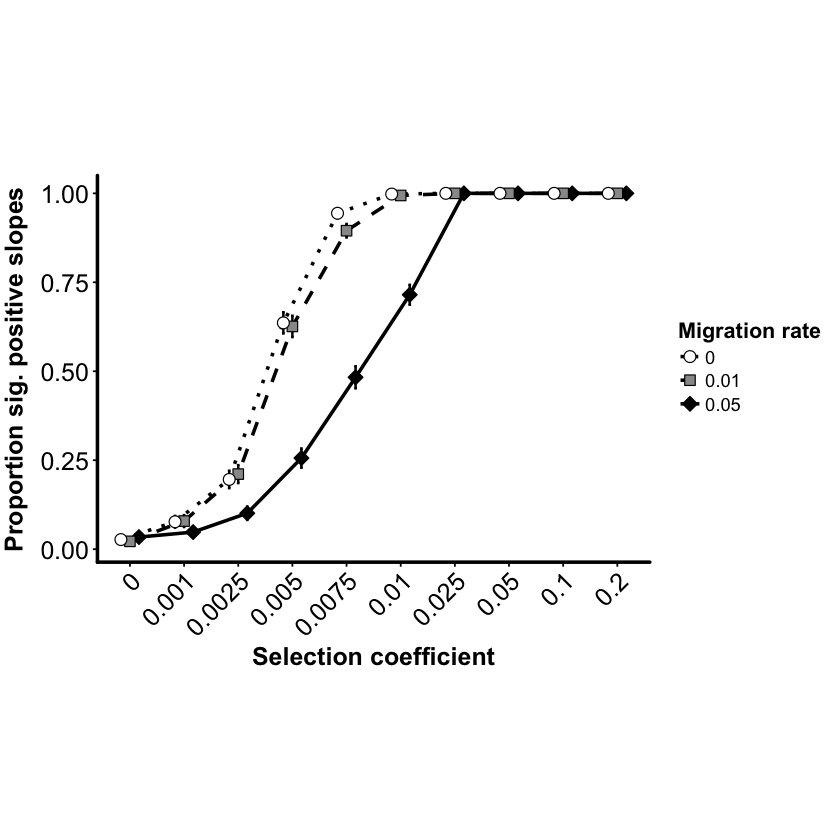

In [10]:
PropSigPos_Sel_Mig <- ggplot(MeansProps_Gen250, aes(x = max_s, y = prop_sigPos, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = prop_sigPos - ci_sigPos, ymax = prop_sigPos + ci_sigPos), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.5)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Proportion sig. positive slopes") + xlab("Selection coefficient") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
PropSigPos_Sel_Mig

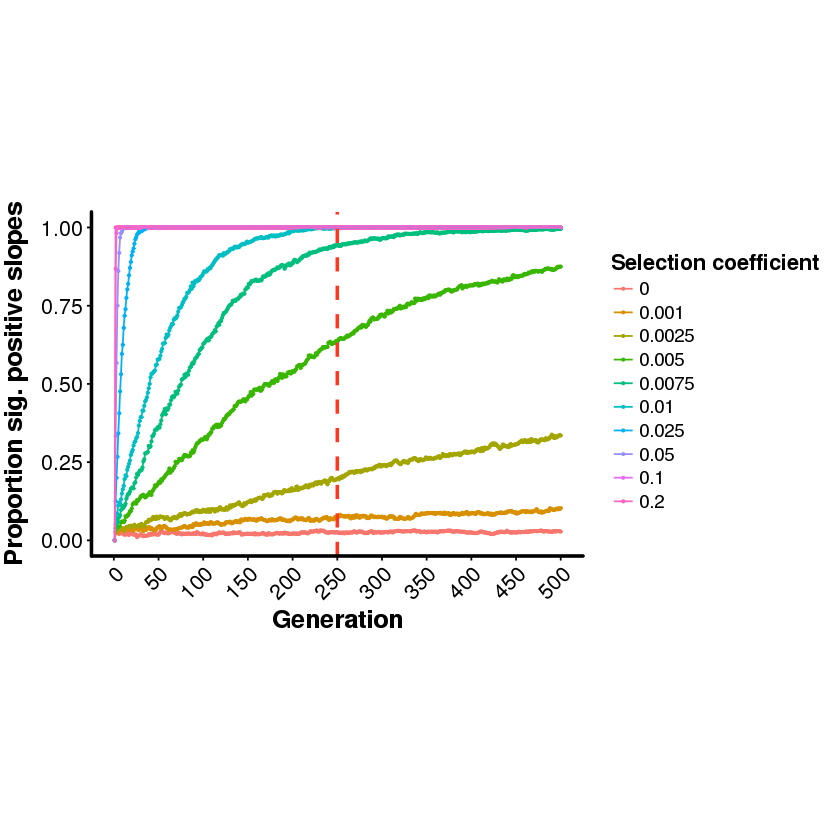

In [20]:
PropSigPos_byGen <- ggplot(MeansProps_NoMig, aes(x = seq, y = prop_sigPos, group = max_s, color = max_s)) + 
    ylab("Proportion sig. positive slopes") + xlab("Generation") + geom_point(size = 0.5, aes(color = max_s)) +
    geom_line(size = 0.5, aes(color = max_s)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Selection coefficient") + 
    geom_vline(xintercept = 250, size = 1, colour = "#FF3721", linetype = "dashed") + ng1.45
PropSigPos_byGen 

In [11]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
MeansProps_melt <- dplyr::select(MeansProps_NoMig_Gen250, max_s, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

#Melt dataframe
dm1 <- melt(MeansProps_melt[,c("max_s", "prop_sigPos", "ci_sigPos")], 
            id=c("max_s", "ci_sigPos"))
dm2 <- melt(MeansProps_melt[,c("max_s", "prop_sigNeg", "ci_sigNeg")], 
            id=c("max_s", "ci_sigNeg"))

#Rename columns
setnames(dm1, old = c("ci_sigPos"), new = "ci")
setnames(dm2, old = c("ci_sigNeg"), new = "ci")

#Merge melted dataframes
MeansProps_melt <- rbind(dm1, dm2)
MeansProps_melt

max_s,ci,variable,value
0,0.010046028,prop_sigPos,0.027
0.001,0.016523509,prop_sigPos,0.077
0.0025,0.024604363,prop_sigPos,0.196
0.005,0.029821901,prop_sigPos,0.636
0.0075,0.014250696,prop_sigPos,0.944
0.01,0.002769085,prop_sigPos,0.998
0.025,0.000000000,prop_sigPos,1.000
0.05,0.000000000,prop_sigPos,1.000
0.1,0.000000000,prop_sigPos,1.000
0.2,0.000000000,prop_sigPos,1.000


In [16]:
MeansProps_melt$variable

[1] prop_sigPos prop_sigPos prop_sigPos prop_sigPos prop_sigPos prop_sigPos
 [7] prop_sigPos prop_sigPos prop_sigPos prop_sigPos prop_sigNeg prop_sigNeg
[13] prop_sigNeg prop_sigNeg prop_sigNeg prop_sigNeg prop_sigNeg prop_sigNeg
[19] prop_sigNeg prop_sigNeg
Levels: prop_sigPos prop_sigNeg

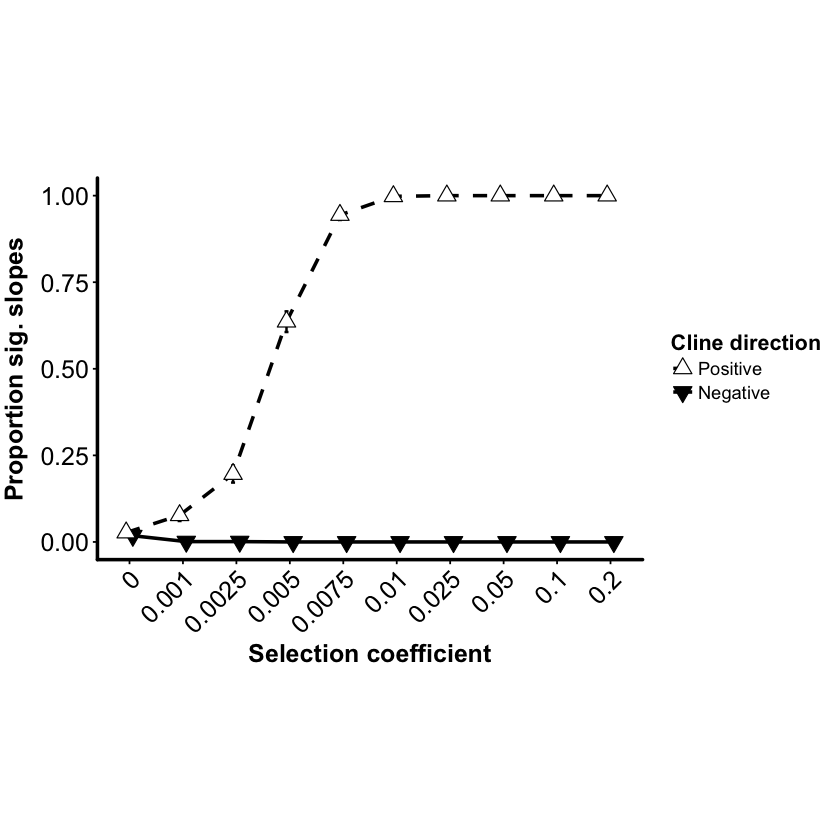

In [23]:
#Plot proportion of significant slopes by migration rate
PropSig_Sel_Dir <- ggplot(MeansProps_melt, aes(x = max_s, y = value, 
    shape = variable, fill = variable, group = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.25)) +
    ylab("Proportion sig. slopes") + xlab("Selection coefficient") + 
    geom_line(size = 1, aes(linetype = variable), position = position_dodge(width = 0.25)) +
    geom_point(size = 3.5, color = "black", position = position_dodge(width = 0.25)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(24, 25)) +
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_linetype_manual(labels = c("Positive", "Negative"), values = c("dashed", "solid")) +
    labs(shape = 'Cline direction', fill = 'Cline direction', linetype = 'Cline direction') + ng1.45
PropSig_Sel_Dir

In [24]:
path = "~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Git/SEC_Figures"

MeanSlope_Sel_Mig_NoLeg = MeanSlope_Sel_Mig + theme(legend.position="none")
# PropSigPos_Sel_Mig_NoLeg = PropSigPos_Sel_Mig + theme(legend.position="none")
PropSig_Sel_Dir_NoLeg = PropSig_Sel_Dir + theme(legend.position="none")

ggsave("MeanSlope_Sel_Mig_NoLeg.pdf", plot = MeanSlope_Sel_Mig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("PropSigPos_Sel_Mig_NoLeg.pdf", plot = PropSigPos_Sel_Mig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("PropSig_Sel_Dir_NoLeg.pdf", plot = PropSig_Sel_Dir_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
